In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import subprocess
import shlex
import numpy as np
import pandas as pd

import os
import sys

import pandas as pd


repo_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(repo_root)

from src.utils.file_handlers import group_dataset_files
from src.utils.c_operation_helpers import  run_simulation
from src.utils.file_handlers import process_directory_real_data

In [2]:
EXPERIMENT_PATH = os.path.join(repo_root, 'exp', 'ex03')
process_directory_real_data(EXPERIMENT_PATH)

### Example

In [5]:
data_dir = os.path.join(repo_root, 'datasets', 'Real_Data')
grouped = group_dataset_files(data_dir)

edge_file = grouped['00003']['edges']
node_file = grouped['00003']['nodes']
edge_path = os.path.join(data_dir, edge_file)
node_path = os.path.join(data_dir, node_file)

results = run_simulation(node_path, edge_path, is_synthetic=0)
print(results)

HO 7
Z 15
BIN 8
BINZ 56


### Full Results

In [4]:


def subtract_columns(df, compared_col):
    columns = df.columns.tolist()
    # base_column = columns[[compared_col]] 
    for col in columns[1:]:
        if col != compared_col:
            df[col] = df[col] - df[compared_col] 
    df[[compared_col]] = 0.00
    return df


def visualize_df(df, title, highlight_max=False):
    """
    Visualizes a DataFrame with custom styling.
    
    Highlights the maximum value in each row if `highlight_max` is True, 
    and hides the index.
    """
    print(f"\n{title}\n")
    
    styled_df = df.style.set_table_styles(
        # [{'selector': 'th', 'props': [('display', 'none')]}], overwrite=False
    ).set_properties(**{
        'background-color': 'LightGray',
        'color': 'black',
        'border-color': 'black',
        'border-style': 'solid',
        'border-width': '1px',
        'text-align': 'left'
    })
    
    # Apply conditional highlighting
    if highlight_max:
        styled_df = styled_df.highlight_max(
            axis=1, color='grey', subset=df.columns.difference(['dataset', 'Name'])
        )
    
    styled_df = styled_df.hide(axis='index')  # Hide the index
    display(styled_df)
   

In [5]:
log_likelihood_df =(
    pd.read_csv(os.path.join(EXPERIMENT_PATH, 'results', 'log_likelihood_summary.csv'))
    .groupby(by=['dataset'])
    .mean()
    .reset_index()
    .drop(columns=['epoch'])
    )

leadership_likelihood_df = (
    pd.read_csv(os.path.join(EXPERIMENT_PATH, 'results', 'leadership_log_likelihood_summary.csv'))
    .groupby(by=['dataset'])
    .mean()
    .reset_index()
    .drop(columns=['epoch'])
)

In [6]:


unique_datasets = pd.read_csv(os.path.join(EXPERIMENT_PATH, 'results', 'log_likelihood_summary.csv'))['dataset'].unique()
dataset_info = pd.read_csv(os.path.join(repo_root, 'datasets', 'dataset_info.csv'))
filtered_dataset_info = dataset_info[dataset_info['Dataset_ID'].isin(unique_datasets)].set_index('Dataset_ID')
filtered_dataset_info = filtered_dataset_info.sort_values(by=['K1', 'K2', 'R', 'Name'])
visualize_df(filtered_dataset_info, 'Datasets Tested')


Datasets Tested



Name,N,M,R,K1,K2,K_avg
APA_Election_2009,5,17469,3493.800000,1,5,3.764000
UCL,173,651,3.763000,2,4,2.725000
FIFA_World_Cup,83,364,4.386000,2,4,2.659000
Network_Science,3517,2461,0.700000,2,14,3.282000
AGH_Course_Selection_2004,7,153,21.857000,7,7,7.000000
Sushi_100,100,5000,50.000000,10,10,10.000000
Sushi_10,10,5000,500.000000,10,10,10.000000


In [7]:


def rename_df(df):
    merged_df = df.merge(dataset_info, left_on='dataset', right_on='Dataset_ID').drop(columns=['Dataset_ID','dataset'])
    # merged_df = merged_df.rename(columns={'Name': 'dataset_name'}).set_index('dataset_name')

    # domain_order = ["Election", "Sport", "Preferences", "Other"]
    # merged_df['Domain'] = pd.Categorical(merged_df['Domain'], categories=domain_order, ordered=True)
    
    merged_df = merged_df.sort_values(by=['K1', 'K2', 'Name'])
    merged_df = merged_df[[ 'Name', 'HO_BT','HOL_BT', 'BIN', 'BINL']]

    return merged_df

In [8]:

log_like = rename_df(log_likelihood_df)
visualize_df(log_like, 'log likelihood', highlight_max=True)


log likelihood



Name,HO_BT,HOL_BT,BIN,BINL
APA_Election_2009,-3.112118,-3.142524,-3.112442,-3.134111
FIFA_World_Cup,-1.384172,-1.402579,-1.396593,-1.423830
UCL,-1.370554,-1.406151,-1.375719,-1.424165
Network_Science,-1.998427,-2.083409,-2.018534,-2.107392
AGH_Course_Selection_2004,-5.934592,-6.674046,-5.951289,-6.674961
Sushi_10,-14.246062,-15.679932,-14.302930,-15.695088
Sushi_100,-14.234528,-15.304322,-14.273120,-15.571650


In [9]:
leadership_log = rename_df(leadership_likelihood_df)
visualize_df(leadership_log, 'Leadership log likelihood', highlight_max=True)


Leadership log likelihood



Name,HO_BT,HOL_BT,BIN,BINL
APA_Election_2009,-1.186890,-1.176338,-1.185118,-1.176996
FIFA_World_Cup,-0.802934,-0.816945,-0.806637,-0.822167
UCL,-0.779867,-0.797012,-0.778330,-0.801251
Network_Science,-0.871851,-0.879977,-0.872008,-0.880782
AGH_Course_Selection_2004,-0.008185,-0.008838,-0.008134,-0.008745
Sushi_10,-2.082543,-1.956758,-2.038492,-1.956765
Sushi_100,-2.048752,-1.948004,-2.014774,-1.953180


/tmp/ipykernel_87801/2102998022.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax1.boxplot(boxplot_data, showfliers=False, labels=labels)
/tmp/ipykernel_87801/2102998022.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot(boxplot_l__data, showfliers=False, labels=labels)


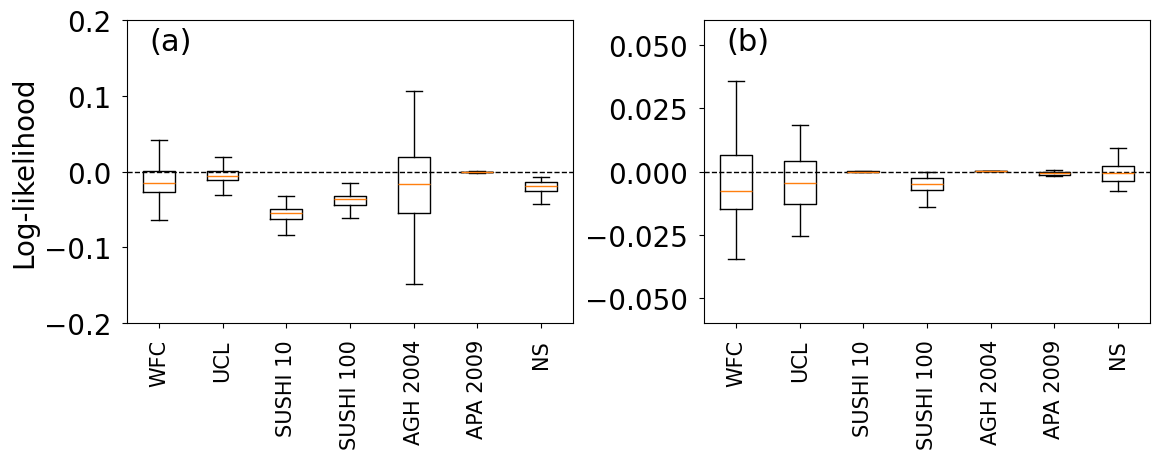

In [10]:

# Load the data
log_likelihood_df = pd.read_csv(os.path.join(EXPERIMENT_PATH, 'results', 'log_likelihood_summary.csv'))
leadership_likelihood_df = pd.read_csv(os.path.join(EXPERIMENT_PATH, 'results', 'leadership_log_likelihood_summary.csv'))

# Set plot style and figure
plt.rc('text', usetex=False)
plt.rc('font', size=20, **{'family':'DejaVu Sans','sans-serif':['Helvetica']})
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# Prepare datasets
labels = ['WFC', 'UCL', 'SUSHI 10', 'SUSHI 100', 'AGH 2004', 'APA 2009', 'NS']
datasets = [1, 2, 3, 4, 5, 6, 7]

# Calculate differences for boxplot data
boxplot_data = [
    (
        log_likelihood_df[log_likelihood_df['dataset'] == dataset]['BIN'] -
        log_likelihood_df[log_likelihood_df['dataset'] == dataset]['HO_BT']
    ).tolist()
    for dataset in datasets
]

boxplot_l__data = [
    (
        leadership_likelihood_df[leadership_likelihood_df['dataset'] == dataset]['BINL'] -
        leadership_likelihood_df[leadership_likelihood_df['dataset'] == dataset]['HOL_BT']
    ).tolist()
    for dataset in datasets
]

# Plot boxplots
ax1.boxplot(boxplot_data, showfliers=False, labels=labels)
ax2.boxplot(boxplot_l__data, showfliers=False, labels=labels)

# Add reference lines
ax1.axhline(y=0, color='black', linestyle='dashed', linewidth=1)
ax2.axhline(y=0, color='black', linestyle='dashed', linewidth=1)

# Set labels, limits, and ticks
ax1.set_ylim(-0.2, 0.2)
ax2.set_ylim(-0.06, 0.06)

ax1.set_ylabel('Log-likelihood')
ax1.set_xticklabels(labels, rotation=90, size=15)
ax2.set_xticklabels(labels, rotation=90, size=15)

# Add subplot annotations
ax1.text(0.05, 0.9, '(a)', transform=ax1.transAxes, fontsize=22)
ax2.text(0.05, 0.9, '(b)', transform=ax2.transAxes, fontsize=22)

# Final layout adjustments and save
fig.tight_layout()
# plt.savefig('real_test.pdf')
plt.show()
